1.无序数据的测试

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale 

Best Configuration:
layers        (100, 50, 25)
activation    tanh
solver        lbfgs
F1-avg        0.7489
F1-std        0.0416
Acc-avg       0.8011
Acc-std       0.0188


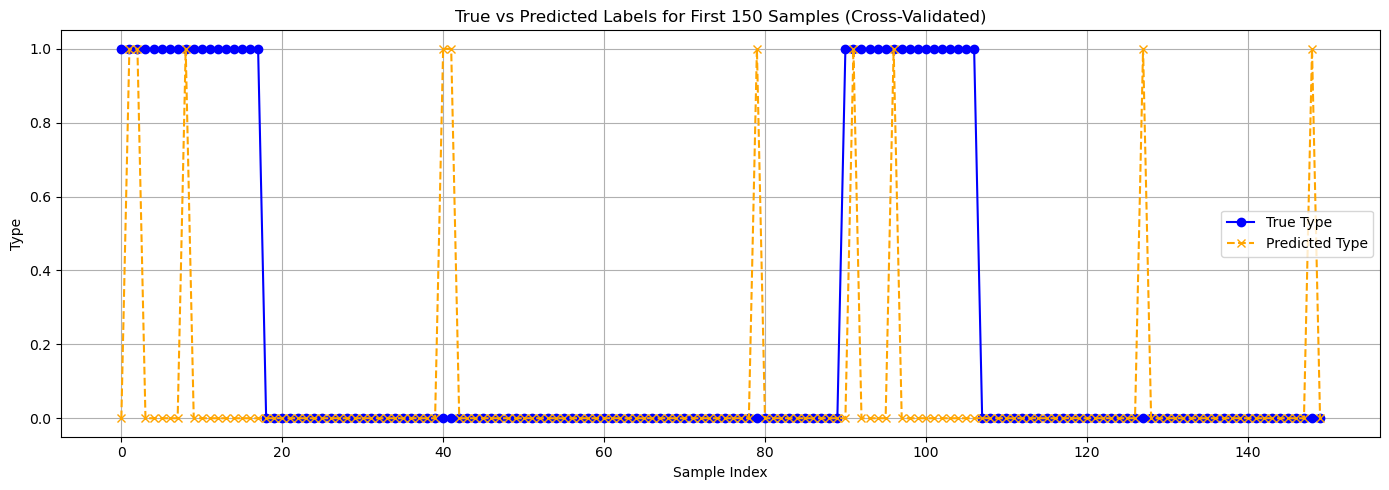

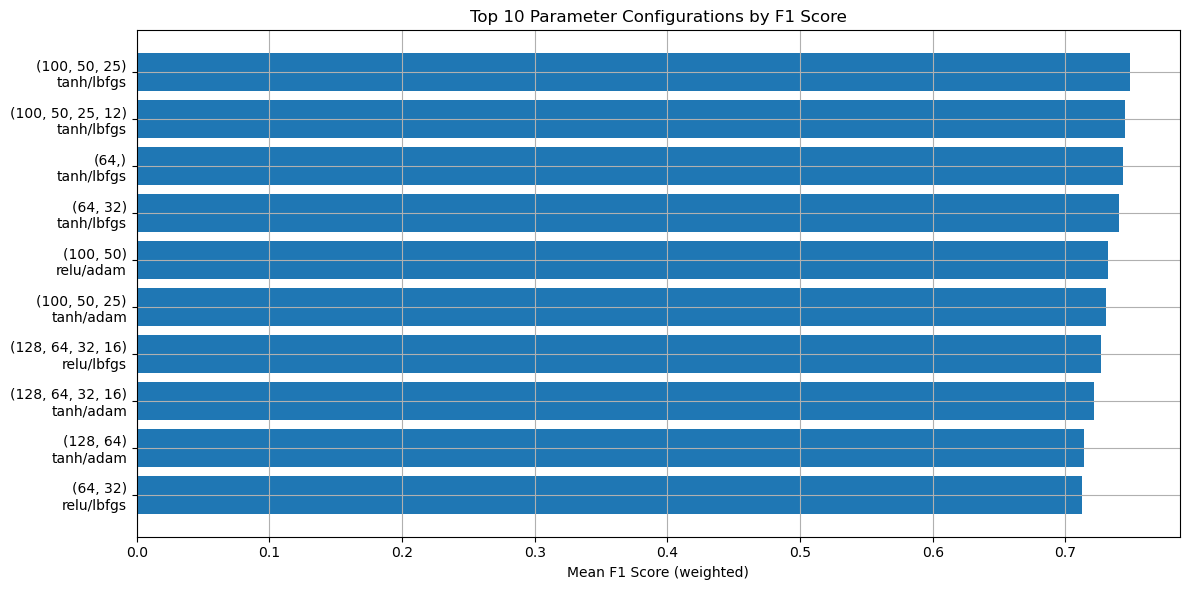

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B).csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32),(128, 64, 32, 16),(100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 3. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)

# 4. 最佳模型及其交叉验证预测
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)

# 5. 计算评估指标
f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')

# 6. 打印最优组合和完整统计信息
print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 7. 可视化前100个预测 vs 实际标签
plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  # 实际值 - 蓝色点线
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  # 预测值 - 橙色叉线
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. 可视化 GridSearch 的前10个参数组合（按 mean_test_score 降序）
cv_results = pd.DataFrame(grid_search.cv_results_)

# 添加简洁标签列
cv_results["config"] = cv_results.apply(
    lambda row: f"{row['param_hidden_layer_sizes']}\n{row['param_activation']}/{row['param_solver']}", axis=1
)

# 排序并取前10
top10 = cv_results.sort_values(by="mean_test_score", ascending=False).head(10)

# 绘图
plt.figure(figsize=(12, 6))
plt.barh(range(10), top10["mean_test_score"][::-1])  # 倒序，为了横图从上到下递减
plt.yticks(range(10), top10["config"][::-1])
plt.xlabel("Mean F1 Score (weighted)")
plt.title("Top 10 Parameter Configurations by F1 Score")
plt.grid(True)
plt.tight_layout()
plt.show()


2.对排序后的的数据测试

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale 

Best Configuration:
layers        (100, 50, 25)
activation    tanh
solver        lbfgs
F1-avg        0.752
F1-std        0.0499
Acc-avg       0.8011
Acc-std       0.0436


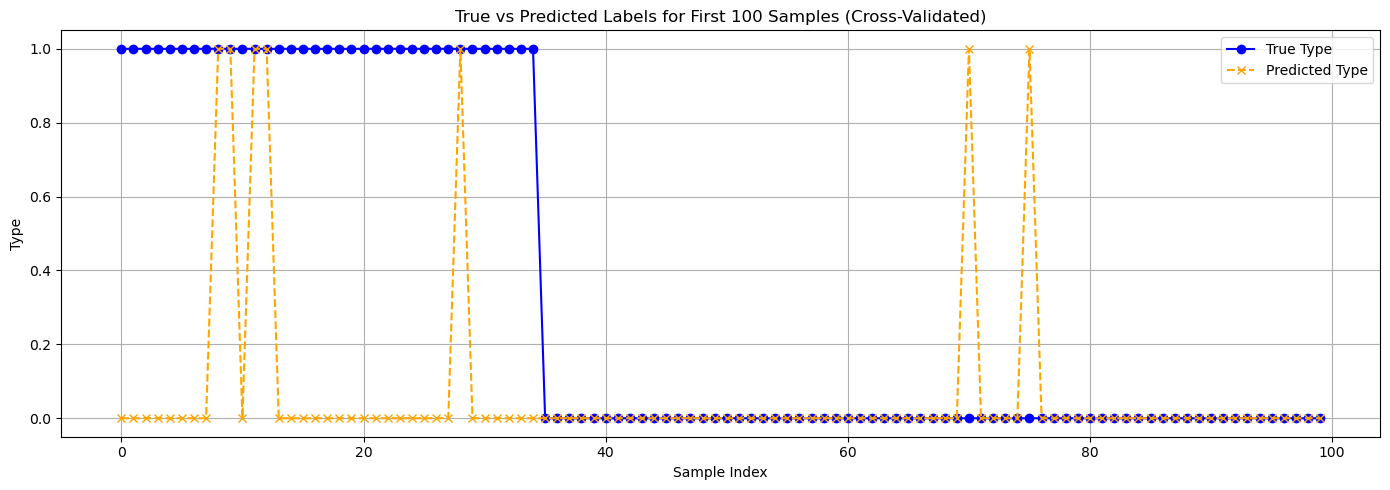

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32),(128, 64, 32, 16),(100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 3. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)

# 4. 最佳模型及其交叉验证预测
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)

# 5. 计算评估指标
f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')

# 6. 打印最优组合和完整统计信息
print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 7. 可视化前100个预测 vs 实际标签
plt.figure(figsize=(14, 5))
plt.plot(y.values[:100], 'bo-', label='True Type')  # 实际值 - 蓝色点线
plt.plot(y_pred_cv[:100], 'x--', color='orange', label='Predicted Type')  # 预测值 - 橙色叉线
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 100 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3.1对数据归一化测试（未排序）

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

Best Configuration:
layers        (100,)
activation    relu
solver        lbfgs
F1-avg        0.9077
F1-std        0.0558
Acc-avg       0.9091
Acc-std       0.0579


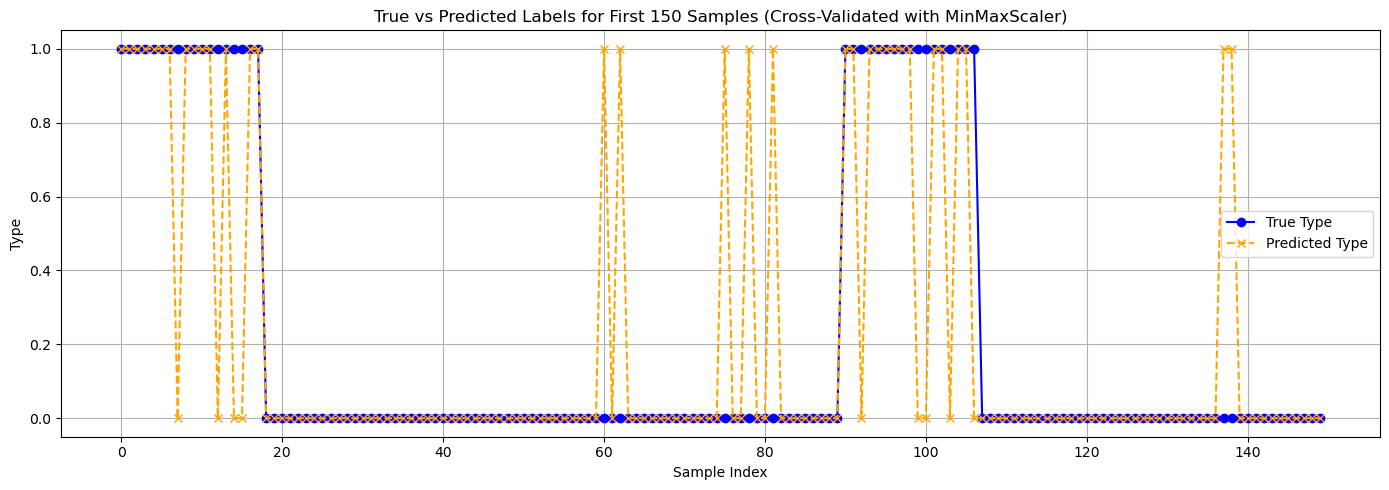

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler  # 使用 MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B).csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 归一化（最小-最大缩放）
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 4. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)

# 5. 最佳模型及其交叉验证预测
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)

# 6. 计算评估指标
f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')

# 7. 打印最优组合和完整统计信息
print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 8. 可视化前150个预测 vs 实际标签
plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  # 实际值 - 蓝色点线
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  # 预测值 - 橙色叉线
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated with MinMaxScaler)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3.2对数据归一化（排序）

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

Best Configuration:
layers        (100, 50, 25)
activation    relu
solver        lbfgs
F1-avg        0.9131
F1-std        0.0264
Acc-avg       0.9148
Acc-std       0.0248


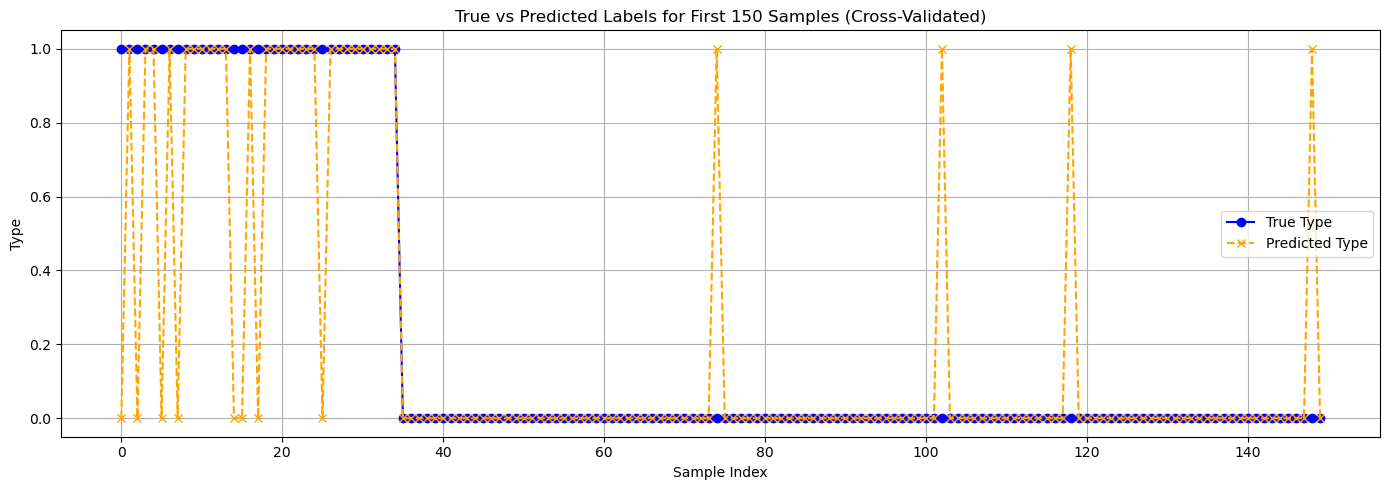

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 归一化（最小-最大缩放）
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 4. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)

# 5. 最佳模型及其交叉验证预测
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)

# 6. 计算评估指标
f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')

# 7. 打印最优组合和完整统计信息
print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 8. 可视化前150个预测 vs 实际标签
plt.figure(figsize=(14, 5))
plt.plot(y.values[:150], 'bo-', label='True Type')  # 实际值 - 蓝色点线
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  # 预测值 - 橙色叉线
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4.1使用SMOTE

e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_netwo

Best Configuration After SMOTE (evaluated on balanced data):
layers        (128, 64)
activation    tanh
solver        lbfgs
F1-avg        0.9644
F1-std        0.0162
Acc-avg       0.9644
Acc-std       0.0161


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\4026643882.py:63: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\4026643882.py:63: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\4026643882.py:63: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  f

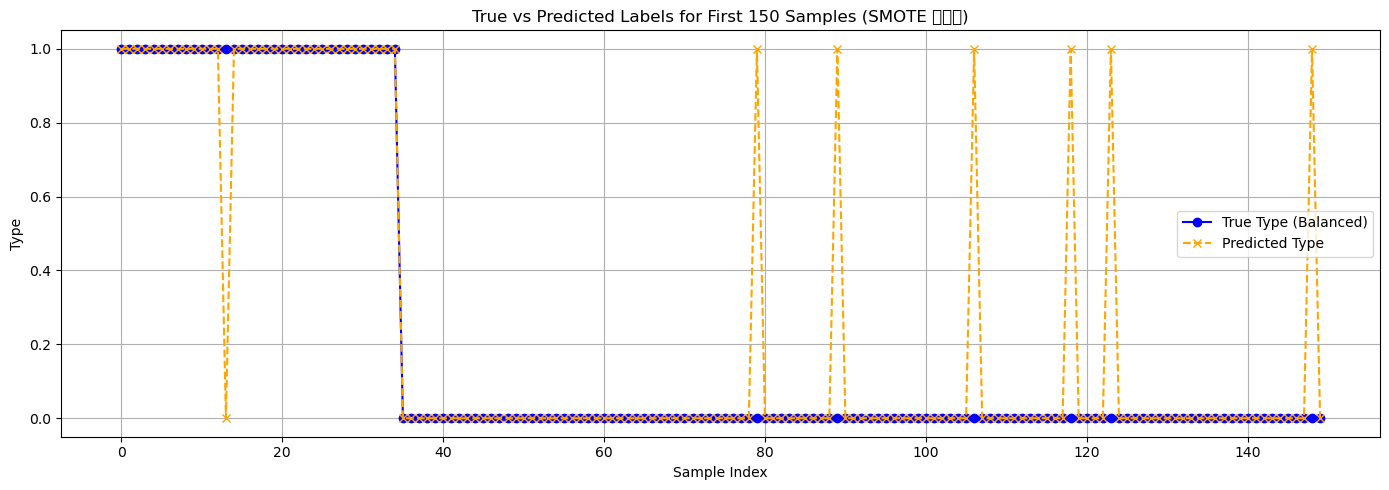

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 归一化（最小-最大缩放）
scaler_SMOTE = MinMaxScaler()
X_scaled_SMOTE = scaler_SMOTE.fit_transform(X)

# 3. 使用 SMOTE 对训练数据过采样
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled_SMOTE, y)

# 4. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 5. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)

# 6. 在平衡后的数据上进行交叉验证和预测（符合说明）
best_model_SMOTE = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_SMOTE, X_bal, y_bal, cv=4)

# 7. 在平衡数据上评估指标
f1_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring='accuracy')

# 8. 打印结果
print("Best Configuration After SMOTE (evaluated on balanced data):")
print(f"layers        {best_model_SMOTE.hidden_layer_sizes}")
print(f"activation    {best_model_SMOTE.activation}")
print(f"solver        {best_model_SMOTE.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 9. 可视化前150个预测 vs 实际标签（平衡数据）
plt.figure(figsize=(14, 5))
plt.plot(y_bal[:150], 'bo-', label='True Type (Balanced)')  # 实际标签
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  # 预测值
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (SMOTE 全流程)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4.2使用ADASYN

e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_netwo

Best Configuration After ADASYN (evaluated on balanced data):
layers        (64, 32)
activation    tanh
solver        lbfgs
F1-avg        0.9605
F1-std        0.0236
Acc-avg       0.9605
Acc-std       0.0236


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\3832983342.py:63: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\3832983342.py:63: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17980\3832983342.py:63: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  f

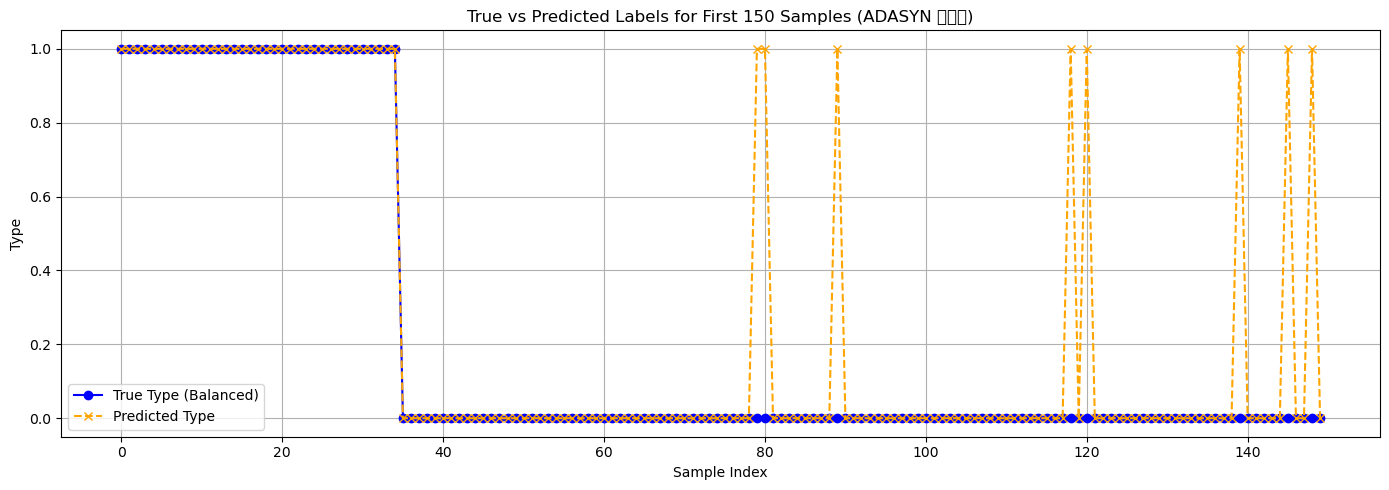

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import ADASYN  # ✅ 使用 ADASYN

# 1. 读取数据
data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

# 2. 归一化（最小-最大缩放）
scaler_ADASYN = MinMaxScaler()
X_scaled_ADASYN = scaler_ADASYN.fit_transform(X)

# 3. 使用 ADASYN 对训练数据过采样
adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X_scaled_ADASYN, y)

# 4. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# 5. 设置模型与网格搜索
model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)

# 6. 在平衡后的数据上进行交叉验证和预测
best_model_ADASYN = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_ADASYN, X_bal, y_bal, cv=4)

# 7. 评估指标
f1_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring='accuracy')

# 8. 打印最优参数与指标
print("Best Configuration After ADASYN (evaluated on balanced data):")
print(f"layers        {best_model_ADASYN.hidden_layer_sizes}")
print(f"activation    {best_model_ADASYN.activation}")
print(f"solver        {best_model_ADASYN.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

# 9. 可视化预测结果
plt.figure(figsize=(14, 5))
plt.plot(y_bal[:150], 'bo-', label='True Type (Balanced)')  # 实际值
plt.plot(y_pred_cv[:150], 'x--', color='orange', label='Predicted Type')  # 预测值
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels for First 150 Samples (ADASYN 全流程)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Проверка сети на контрольной выборке C

- Метод балансировки:SMOTE
Best Configuration After SMOTE (evaluated on balanced data):
layers        (128, 64)
activation    tanh
solver        lbfgs
F1-avg        0.9644
F1-std        0.0162
Acc-avg       0.9644
Acc-std       0.0161


Контрольная выборка C - Проверка лучшей модели (SMOTE):
Accuracy: 0.931
F1 Score (weighted): 0.931


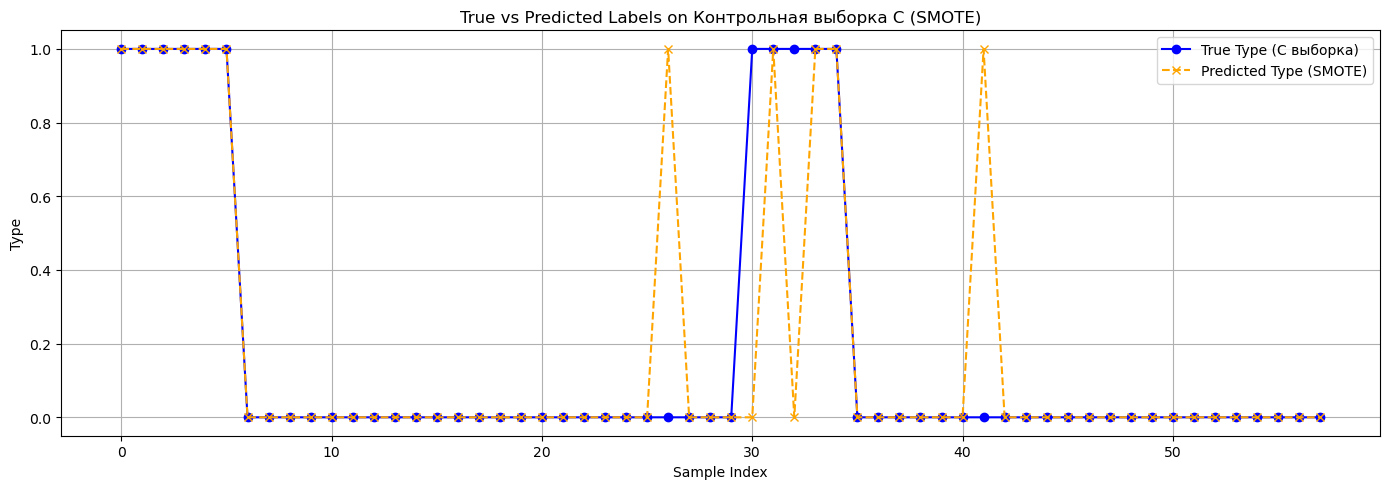

In [25]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1. 读取 контрольная выборка C
test_C = pd.read_csv("../data/test_C.csv")  
X_C = test_C.drop(columns=["Type"])
y_C = test_C["Type"]

# 2. 使用 SMOTE 流程中训练集的 scaler 进行归一化 transform
X_C_scaled = scaler_SMOTE.transform(X_C)

# 3. 使用 SMOTE 流程中训练好的模型进行预测
y_C_pred = best_model_SMOTE.predict(X_C_scaled)

# 4. 输出评估指标
acc_C = accuracy_score(y_C, y_C_pred)
f1_C = f1_score(y_C, y_C_pred, average='weighted')

print("Контрольная выборка C - Проверка лучшей модели (SMOTE):")
print(f"Accuracy: {round(acc_C, 4)}")
print(f"F1 Score (weighted): {round(f1_C, 4)}")

# 5. 可视化预测 vs 实际
plt.figure(figsize=(14, 5))
plt.plot(y_C.values[:150], 'bo-', label='True Type (C выборка)')
plt.plot(y_C_pred[:150], 'x--', color='orange', label='Predicted Type (SMOTE)')
plt.xlabel("Sample Index")
plt.ylabel("Type")
plt.title("True vs Predicted Labels on Контрольная выборка C (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
